In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '11c_HhAyF2hqrOcdtTnwB0G90vqIsyuUz'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('RUL_training-data.xlsx')

!pip install -q xlrd

import pandas as pd
df = pd.read_excel('RUL_training-data.xlsx')
print(df)

       Unit number  Time (cycles)  ...  Sensor 20  Sensor 21
0                1              1  ...      28.58    17.1735
1                1              2  ...      38.99    23.3619
2                1              3  ...      14.83     8.8555
3                1              4  ...      24.42    14.7832
4                1              5  ...      10.99     6.4025
...            ...            ...  ...        ...        ...
45913          218            129  ...      10.57     6.2985
45914          218            130  ...      10.40     6.2741
45915          218            131  ...      10.37     6.1978
45916          218            132  ...      14.70     8.6761
45917          218            133  ...      14.19     8.5120

[45918 rows x 26 columns]


In [ ]:
# we import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn import metrics

x_input = df.to_numpy()
print("shape of input array is:")
print(x_input.shape)
print("----------------")

shape of input array is:
(45918, 26)
----------------


In [ ]:
time = []
#time array is the collection of life of all engine times 

for i in range(0, x_input.shape[0]-1):
  if x_input[i][0] != x_input[i+1][0]:
    time.append(x_input[i][1])
  else:
    continue

time.append(x_input[x_input.shape[0]-1][1])
time = np.array(time)
time.shape 
#time.shape should give number of engines i.e. 133

(218,)

In [ ]:
#we will generate output array here

y_train = []

#array y gives RUL - Remaining Useful Life corresponding to each row in x

j = 0
for i in range(0, x_input.shape[0]):
  y_train.append(time[j] - x_input[i][1])
  if time[j] == x_input[i][1]:
    j = j+1

y_train = np.array(y_train)
y_train.shape
#shape of y (output) should be same as x (input)

(45918,)

In [ ]:
x_train = np.delete(x_input, 0, 1)
x_train.shape
#deleting time column from input array x
# 'DO NOT RUN THIS CELL AGAIN'
# CAUTION CAUTION CAUTION CAUTION CAUTION CAUTION

(45918, 25)

In [ ]:
#importing test data:

file_id = '1l_jOjgrQNVipZsRgSTHd0Qf81oloHmTX'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('RUL_testing-data.xlsx')

df2 = pd.read_excel('RUL_testing-data.xlsx')
df2

,Unit number,Time (cycles),op setting 1,op setting 2,op setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21
0,1,1,0.0016,0.0002,100,518.67,642.88,1587.21,1412.44,14.62,21.61,553.33,2388.12,9042.41,1.30,47.57,521.44,2388.10,8124.04,8.4363,0.03,393,2388,100.00,38.97,23.3029
1,1,2,24.9993,0.6215,80,462.54,536.45,1262.64,1055.44,7.05,9.02,175.04,1915.12,7983.34,0.94,36.81,164.32,2027.95,7865.20,10.8935,0.02,308,1915,84.93,14.29,8.6686
2,1,3,0.0004,0.0000,100,518.67,642.65,1589.75,1409.54,14.62,21.61,554.31,2388.18,9037.61,1.30,47.49,521.15,2388.19,8121.12,8.4620,0.03,393,2388,100.00,38.91,23.2693
3,1,4,10.0034,0.2500,20,489.05,604.44,1499.93,1315.34,10.52,15.49,393.88,2318.94,8761.83,1.26,45.41,371.42,2388.21,8123.53,8.6815,0.03,369,2319,100.00,28.60,17.0930
4,1,5,0.0024,0.0011,100,518.67,642.74,1585.47,1408.12,14.62,21.61,553.53,2388.13,9041.98,1.30,47.66,520.86,2388.13,8118.30,8.4617,0.03,392,2388,100.00,38.82,23.3124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,218,86,35.0013,0.8404,60,449.44,556.14,1367.80,1129.58,5.48,8.00,193.42,2222.90,8342.83,1.02,42.04,182.99,2388.01,8065.66,9.3426,0.02,335,2223,100.00,14.62,8.8457
29816,218,87,25.0041,0.6200,80,462.54,536.97,1262.93,1051.83,7.05,9.03,175.27,1915.34,8007.53,0.94,36.89,164.96,2028.18,7871.94,10.9421,0.02,306,1915,84.93,14.41,8.4964
29817,218,88,20.0043,0.7000,0,491.19,607.93,1492.15,1252.99,9.35,13.66,333.62,2324.06,8723.49,1.08,44.53,314.86,2388.09,8059.65,9.2862,0.02,368,2324,100.00,24.42,14.5244
29818,218,89,20.0037,0.7000,0,491.19,607.85,1490.80,1254.70,9.35,13.66,333.77,2324.00,8720.59,1.08,44.55,314.86,2388.09,8062.13,9.2599,0.02,365,2324,100.00,24.45,14.5694


In [ ]:
x_input2 = df2.to_numpy()
x_input2.shape

(29820, 26)

In [ ]:
time2 = []

for i in range(0, x_input2.shape[0]-1):
  if x_input2[i][0] != x_input2[i+1][0]:
    time2.append(x_input2[i][1])
  else:
    continue

time2.append(x_input2[x_input2.shape[0]-1][1])
time2 = np.array(time2)
time2.shape 

(218,)

In [ ]:
y_test = []

#array y gives RUL - Remaining Useful Life corresponding to each row in x

j = 0
for i in range(0, x_input2.shape[0]):
  y_test.append(time2[j] - x_input2[i][1])
  if time2[j] == x_input2[i][1]:
    j = j+1

y_test = np.array(y_test)
y_test.shape

(29820,)

In [ ]:
x_test = np.delete(x_input2, 0, 1)
x_test.shape
#deleting time column from input array x
# 'DO NOT RUN THIS CELL AGAIN'
# CAUTION CAUTION CAUTION CAUTION CAUTION CAUTION

(29820, 25)

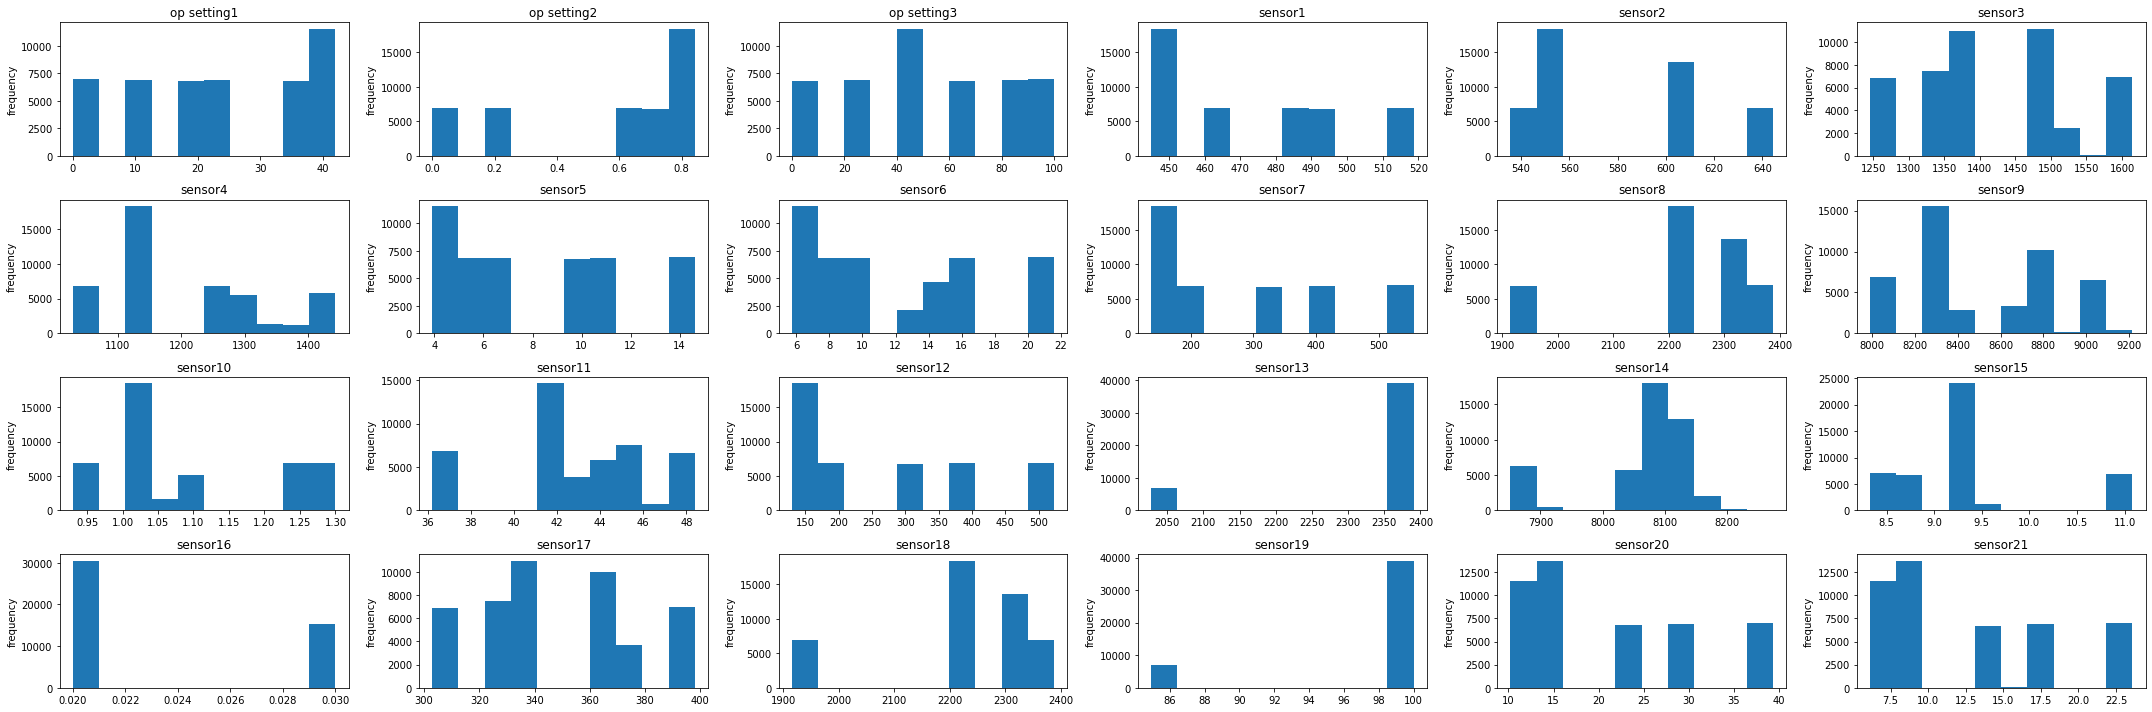

In [ ]:
# ab hamare paas x_train, y_train, x_test and y_test hai
# x_train and y_train se model train krke, x_test and y_test pr test krna hai...

# DATA VISUALIZATION

#1. plotting frequency of each column

fig, axes= plt.subplots(figsize=(30, 10), nrows=4, ncols=6)
#axes[0][1].set_title("Inverted Plot")

count = 1
for i in range(0, 4):
  for j in range(0, 6):
    if count <= 3:
      axes[i][j].set_title("op setting" + str(count))
    else:
      axes[i][j].set_title("sensor" + str(count-3))
    axes[i][j].hist(x_train[:, count], bins = 10)
    axes[i][j].set_ylabel('frequency')
    count = count+1

plt.tight_layout()
plt.show()

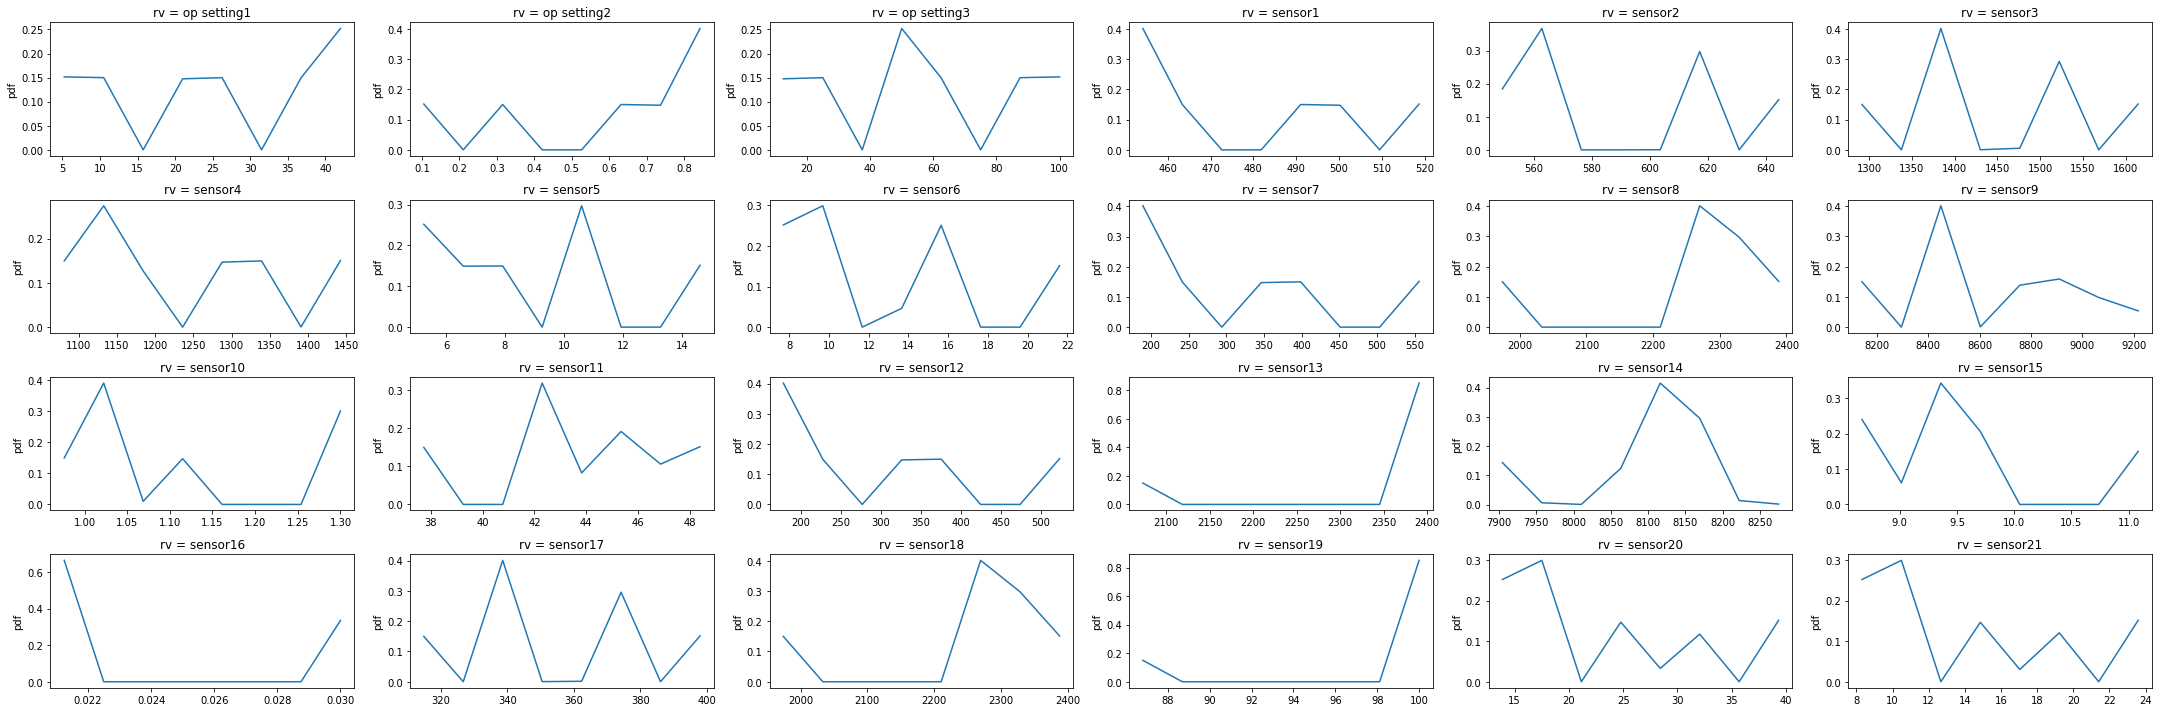

In [ ]:
#2. Plotting pdf with random variable as different columns
fig, axes= plt.subplots(figsize=(30, 10), nrows=4, ncols=6)

count = 1
for i in range(0, 4):
  for j in range(0, 6):
    if count <= 3:
      axes[i][j].set_title("rv = op setting" + str(count))
    else:
      axes[i][j].set_title("rv = sensor" + str(count-3))
    frequency, bins = np.histogram(x_train[:,count],bins=8)
    pdf = frequency/(sum(frequency))
    axes[i][j].plot(bins[1:] , pdf)
    axes[i][j].set_ylabel('pdf')
    count = count+1

plt.tight_layout()
plt.show()

Till now, sensor 20, 21 ka pdf same hai;; 
sensor 13, 19 ka pdf same hai;; 
sensor 3, 9 ka lagbhag same


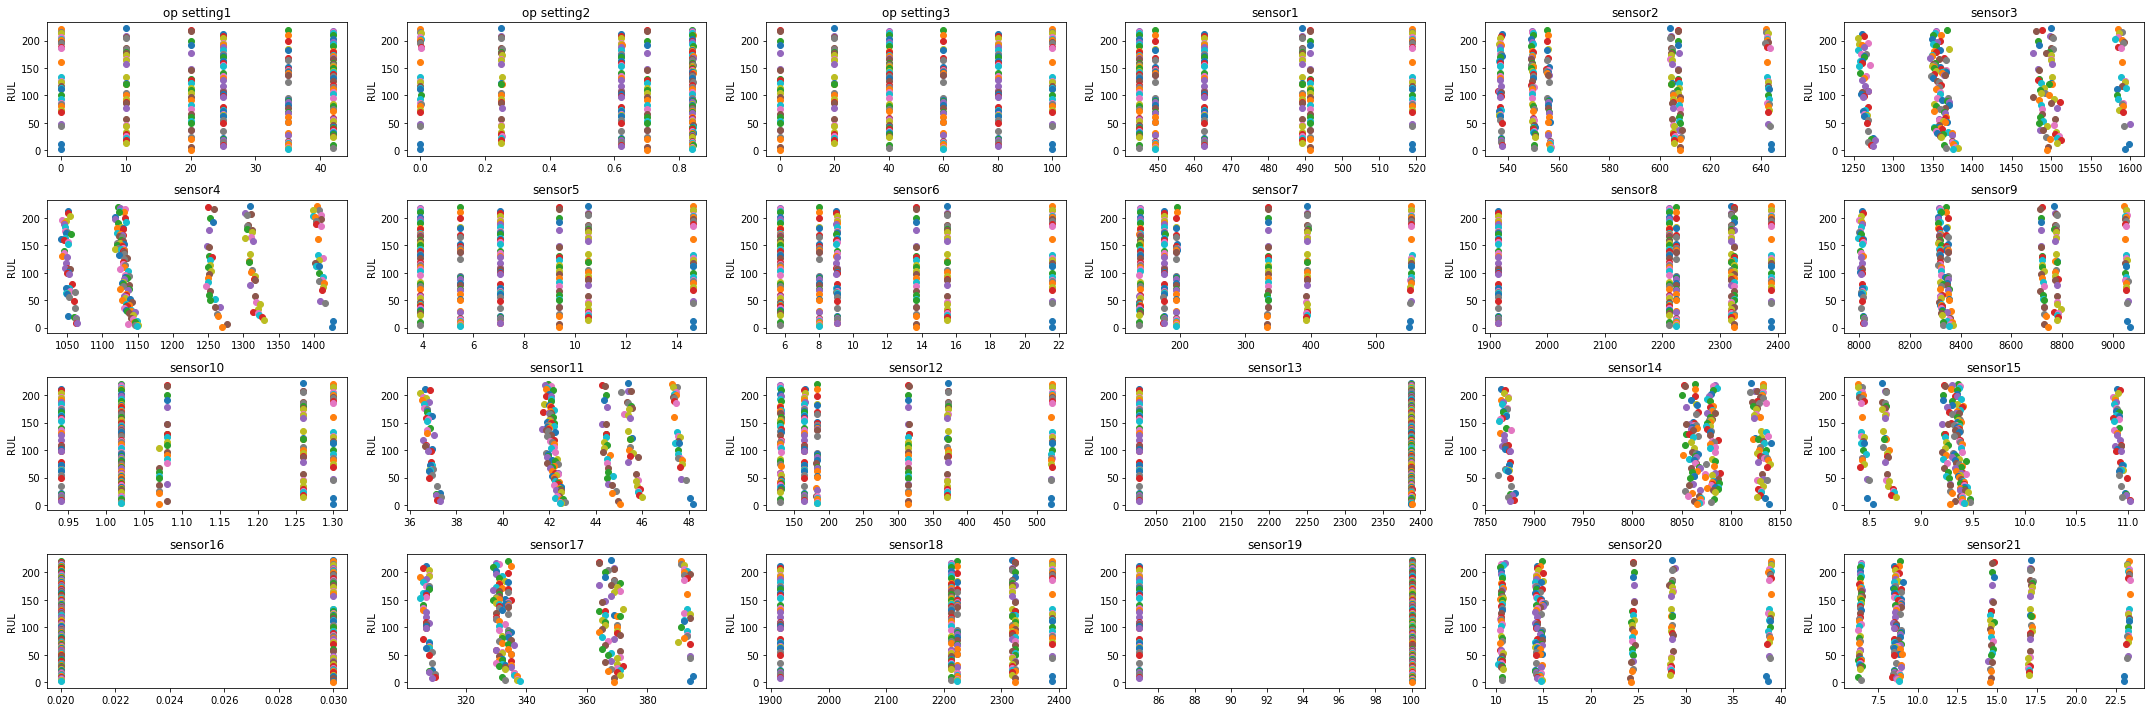

In [ ]:
#These graphs are particularly for engine number: 1
fig, axes= plt.subplots(figsize=(30, 10), nrows=4, ncols=6)

count = 1
for i in range(0, 4):
  for j in range(0, 6):
    if count <= 3:
      axes[i][j].set_title("op setting" + str(count))
    else:
      axes[i][j].set_title("sensor" + str(count-3))
    k = 0
    while y_train[k] != 0:
      axes[i][j].scatter(x_train[k, count], y_train[k])
      k = k+1
    axes[i][j].set_ylabel('RUL')
    count = count+1

plt.tight_layout()
plt.show()

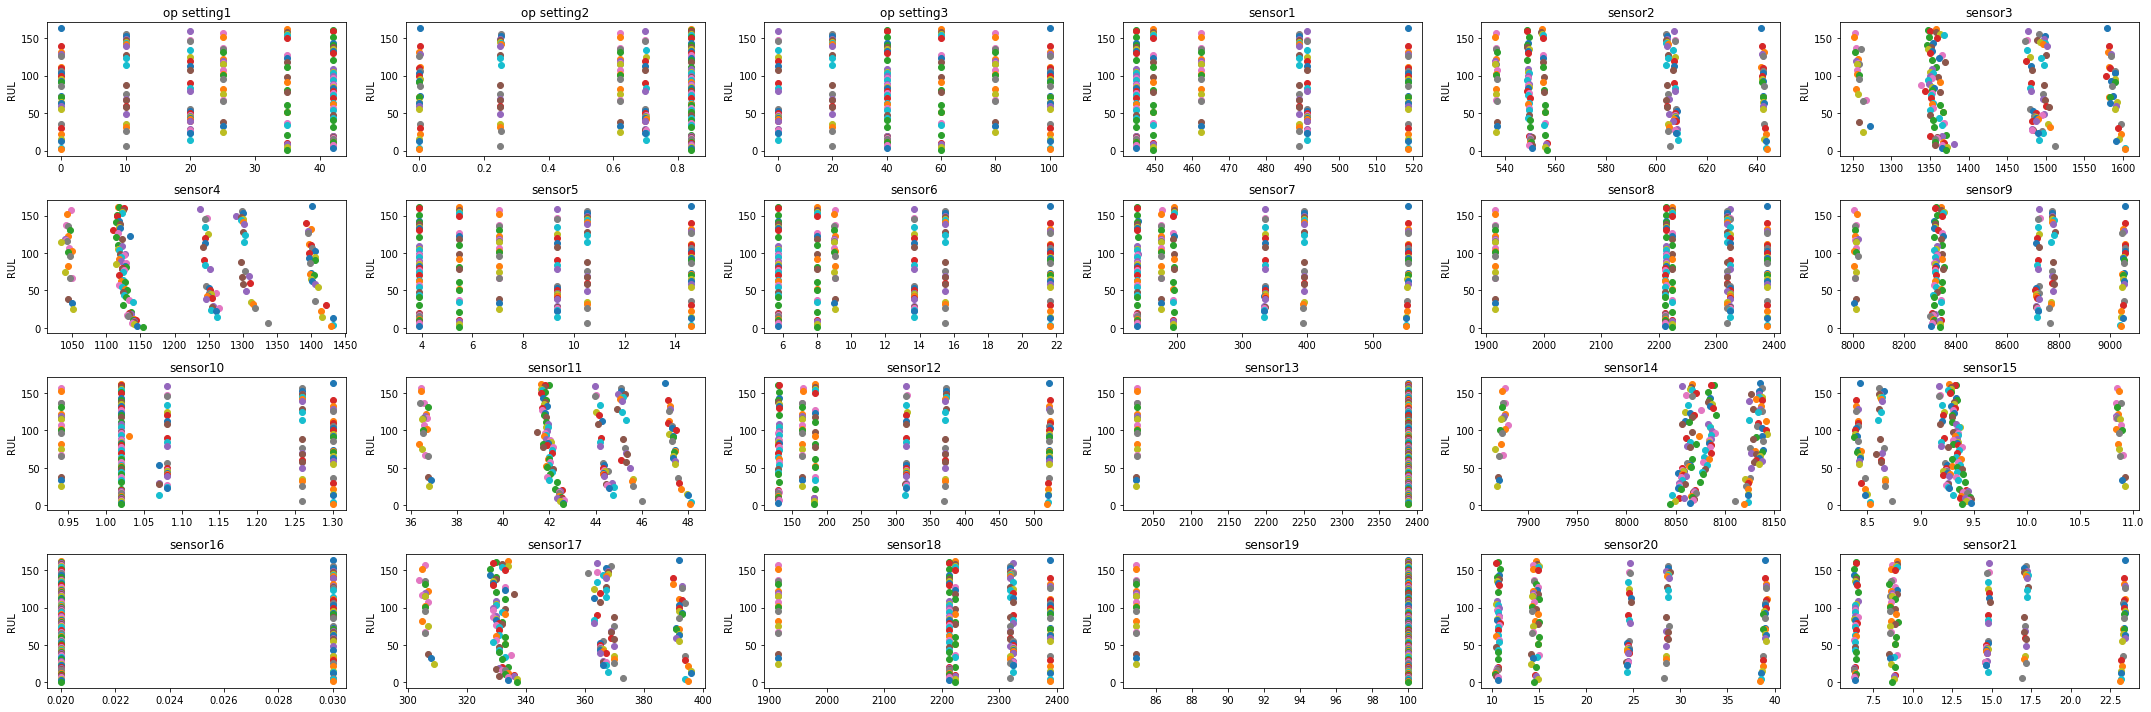

In [ ]:
#These graphs are particularly for engine number: 2
fig, axes= plt.subplots(figsize=(30, 10), nrows=4, ncols=6)

count = 1
for i in range(0, 4):
  for j in range(0, 6):
    if count <= 3:
      axes[i][j].set_title("op setting" + str(count))
    else:
      axes[i][j].set_title("sensor" + str(count-3))
    k = 223
    while y_train[k] != 0:
      axes[i][j].scatter(x_train[k, count], y_train[k])
      k = k+1
    axes[i][j].set_ylabel('RUL')
    count = count+1

plt.tight_layout()
plt.show()

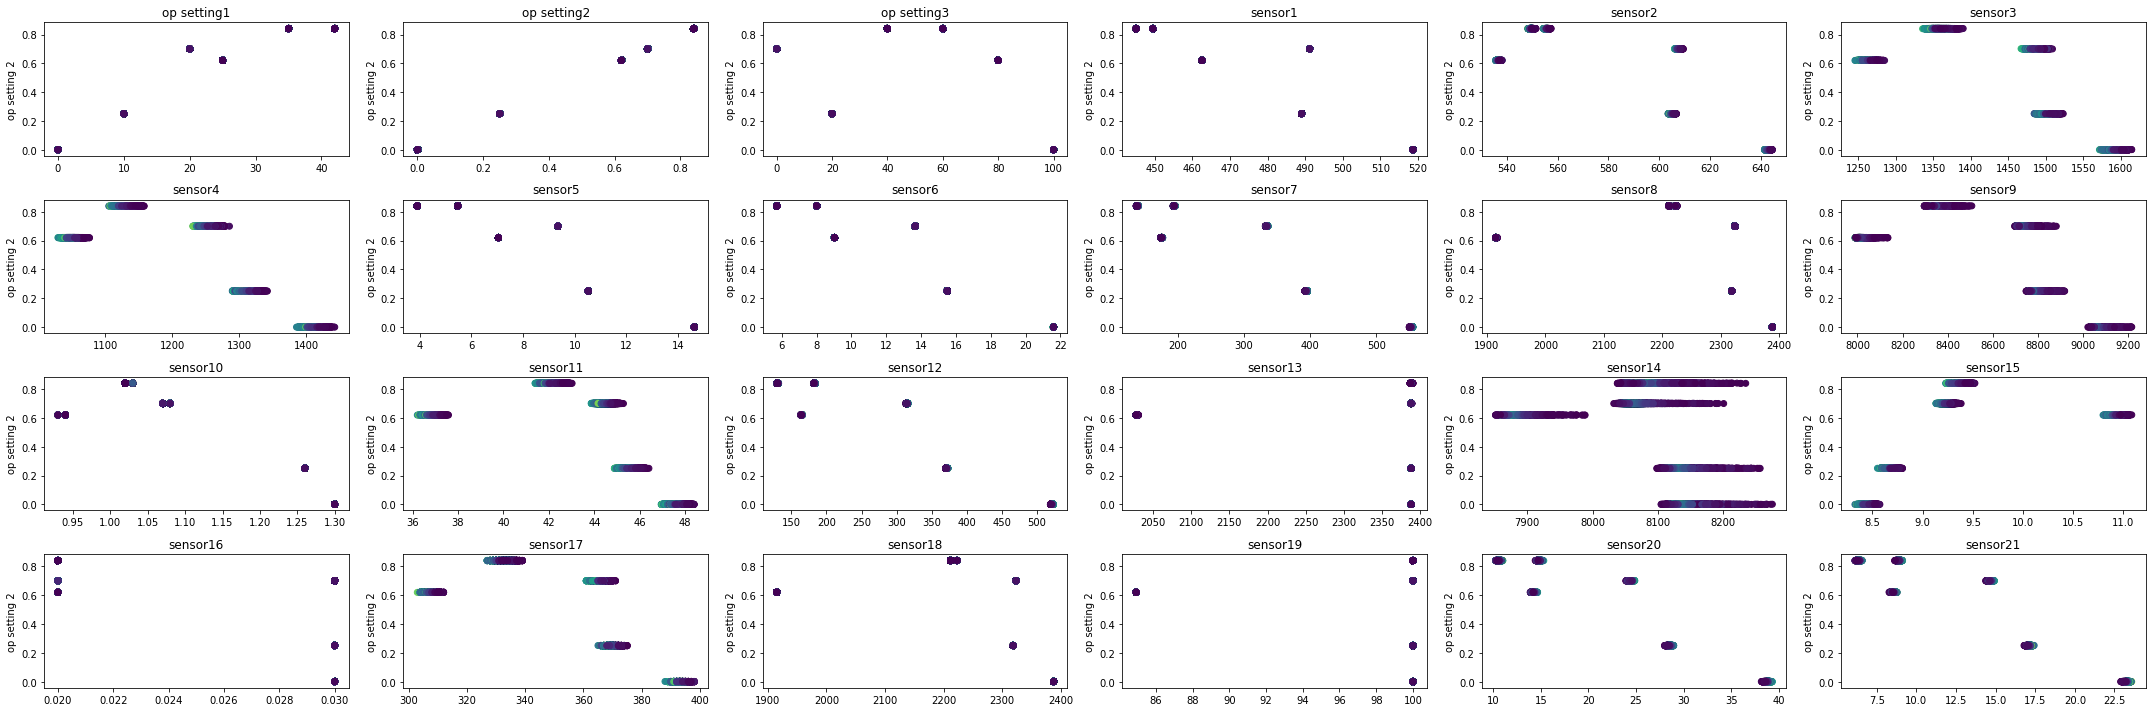

In [ ]:
# Variation in each feature versus other features - SCATTER PLOT
# option to operate the feature on y-axis
fig, axes= plt.subplots(figsize=(30, 10), nrows=4, ncols=6)

count = 1
for i in range(0, 4):
  for j in range(0, 6):
    if count <= 3:
      axes[i][j].set_title("op setting" + str(count))
    else:
      axes[i][j].set_title("sensor" + str(count-3))
    axes[i][j].scatter(x_train[:, count], x_train[:, 2], c = y_train)
    axes[i][j].set_ylabel('op setting 2')
    count = count+1

plt.tight_layout()
plt.show()

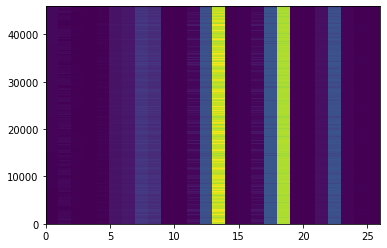

In [ ]:
# heat map
plt.pcolor(df[2:])
plt.show()

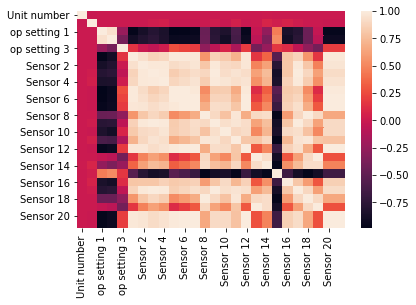

In [ ]:
import seaborn as sb

corr = df.corr() 
sb.heatmap(corr) 

In [ ]:
# we wnat to find maximum RUL
# We will kind of have 'int(max)' classes

max = -1
for i in range(0, y_train.shape[0]):
  if y_train[i] > max:
    max = y_train[i]

print(max)

356.0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x_train[1:])
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

pca.explained_variance_ratio_.sum()

# only 3 features after PCA explain 99% of total variance

0.9921966179346285

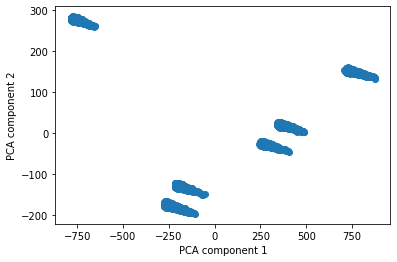

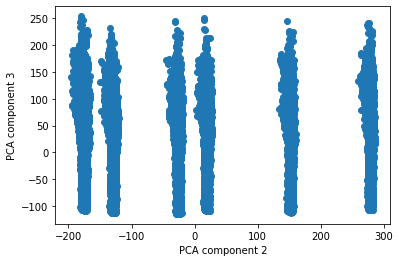

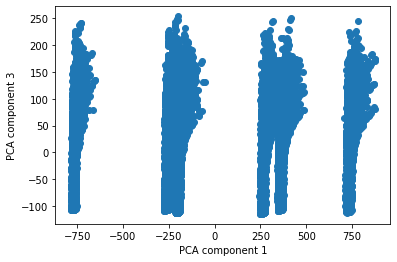

In [ ]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1])
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

plt.scatter(x_train_pca[:, 1], x_train_pca[:, 2])
plt.xlabel("PCA component 2")
plt.ylabel("PCA component 3")
plt.show()

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 2])
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 3")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(x_train_pca, y_train)
y_pred = reg.predict(x_train_pca)

z = 0
for i in range(0, x_train_pca.shape[0]):
  if y_train[i] - y_pred[i] < 5:
    z = z+1

print(z)

18051


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
z = 0
for i in range(0, x_train_pca.shape[0]):
  if y_train[i] - y_pred[i] < 5:
    z = z+1

print(z)

18051


In [ ]:
from sklearn.svm import SVC

model1 = SVC(kernel='linear', C=1)
ak1 = model1.fit(x_train_pca[0:5000, :], y_train[0:5000])
y_pred=ak1.predict(x_train_pca[0:5000, :])

z = 0
for i in range(0, 5000):
  if y_train[i] - y_pred[i] < 5:
    z = z+1

print(z)

In [ ]:
#neural network from 2nd notebook

#neural network
import tensorflow as tf
from tensorflow.keras import layers, Model

input = layers.Input(shape=(3,),name='layer1')
k1 = layers.Dense(50,activation='tanh')(input)
k2 = layers.Dense(50,activation='tanh')(k1)
k3 = layers.Dense(50,activation='tanh')(k2)
output=layers.Dense(1)(k3)
model = Model(input,output)

model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(lr = 0.01))

model.fit(x_train_pca, y_train, epochs = 50, verbose = 0)


In [ ]:
y_pred = model.predict(x_test_pca)

z = 0
for i in range(0, y_test.shape[0]):
  if y_test[i] - y_pred[i] < -10:
    z = z+1

print(z)
print(y_test.shape[0])